<a href="https://colab.research.google.com/github/mithamokelvinm/linear_regression_with_tf.keras/blob/main/Validation_Sets_and_Test_Sets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Validation Sets and Test Sets**

In the previous exercises, we evaluated the trained model aganist the training set. which does not provide a strong signal about the quality of the model.

Here, we'll experiment with validation sets and test sets.

**Learning Objectives**

We'll learn to:
- Split a training set into a smaller training set and a validation set.
- Analyze deltas between the training set and validation set results.
- Test the trained model with a test set to determine whether your trained model is overfitting.
- Detect and fix a common training problem.

**The Dataset**

This exercise uses the California Housing Dataset to predict the `median_house_value` at the cityblock level.

Like many famous datasets, the California Housing Dataset actually consists of two separate datasets each living in separate .csv files:
- The training set is in california_housing_train.csv
- The test set is in california_housing_test.csv

You'll create the validation set by dividing the downloaded training set into two parts:
- A smaller training set
- A validation set

**Import Relevant Modules**

In [1]:
# Import relevant modules
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

**Load the datasets from the internet**

The following two code cells loads the separate .csv files and creates the following two pandas dataframes:
- `train_df` which contains the training set.
- `test_df` which contains the test set.

In [2]:
# Load the datasets
train_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")
test_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_test.csv")

**Scale the label values**

In [3]:
# Scale the label values
scale_factor = 1000.0

# Scale the training set's label
train_df["median_house_value"] /= scale_factor

# Scale the test set's label
test_df["median_house_value"] /= scale_factor

**Load the functions that build and train a model**

The following code cell defines two functions:
- `build_model` which defines the model's topography
- `train_model` which will ultimately train the model, outputtin not only the loss value for the training set but also loss value for the validation set.

In [7]:
# Define the functions that build and train a model
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential
  model = tf.keras.models.Sequential()

  # Add one linear layer to the model to yield a simple linear regressor.
  model.add(tf.keras.layers.Dense(units = 1, input_shape = (1,)))

  # Compile the model topography into code that TensorFlow can efficiently
  # execute. Configure training to minimize the model's mean squared error.
  model.compile(optimizer = tf.keras.optimizers.RMSprop(lr = my_learning_rate),
                loss = "mean_squared_error",
                metrics = [tf.keras.metrics.RootMeanSquaredError()])
  
  return model


def train_model(model, df, feature, label, my_epochs,
                my_batch_size = None, my_validation_split = 0.1):
  """Feed a dataset into the model in order to train it."""

  history = model.fit(x = df[feature],
                      y = df[label],
                      batch_size = my_batch_size,
                      epochs = my_epochs,
                      validation_split = my_validation_split)
  
  # Gather the model' trained weight and bias
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the rest of history
  epochs = history.epoch

  # Isolate the root mean squared error for each epoch
  hist = pd.DataFrame(history.history)
  rmse = hist["root_mean_squared_error"]

  return epochs, rmse, history.history


print("Defined the build_model amd train_model functions")

Defined the build_model amd train_model functions


**Define the plotting functions**

The `plot_the_loss_curve` plots loss vs. epochs for both the training set and the validation set.

In [12]:
# Define the plotting functions
def plot_the_loss_curve(epochs, mae_training, mae_validation):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epochs")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs[1:], mae_training[1:], label = "Training Loss")
  plt.plot(epochs[1:], mae_validation[1:], label = "Validation Loss")
  plt.legend()

  # We're not going to plot the first epoch, since the loss on the
  # first epoch is often substantially greater than the loss for 
  # the other epochs.
  merged_mae_list = mae_training[1:] + mae_validation[1:]
  highest_loss = max(merged_mae_list)
  lowest_loss = min(merged_mae_list)
  delta = highest_loss - lowest_loss
  print(delta)

  top_of_y_axis = highest_loss + (delta * 0.05)
  bottom_of_y_axis = lowest_loss - (delta * 0.05)

  plt.ylim([bottom_of_y_axis, top_of_y_axis])
  plt.show()


print("Defined the plot_the_loss_curve function")

Defined the plot_the_loss_curve function


**Task 1: Experiment with validation splits**

In the following code cell, we'll see a variable named `validation_split`, which is initialized as 0.2.

The `validation_split` variable specifies the proportion of the original training set that will serve as the validation set.

The original training set contains 17,000 examples.

Therefore, a `validation_split` of 0.2 means that:
- 17000 * 0.2 ~= 3,400 examples will therefore become the validation set.
- 17000 * 0.8 ~= 13,600 examples will therefore become the training set.

The following code builds a model, trains it on the training set, and evaluates the built model on both:
- The `training_set`
- And the `validation_set`

If the data in the training set is similar to the data in the validation set, then the two loss curves and the final loss values should be almost identical.

However, the loss curves and final loss values are not almost identical. Hmm, that's odd.

Experiement with two or three different values of the `validation_split`

Do different values of `validation_split` fix the problem?

Epoch 1/30
136/136 [==============================] - 1s 3ms/step - loss: 41842.8828 - root_mean_squared_error: 204.5553 - val_loss: 50740.0898 - val_root_mean_squared_error: 225.2556
Epoch 2/30
136/136 [==============================] - 0s 2ms/step - loss: 24304.5215 - root_mean_squared_error: 155.8991 - val_loss: 29909.0781 - val_root_mean_squared_error: 172.9424
Epoch 3/30
136/136 [==============================] - 0s 2ms/step - loss: 12916.9297 - root_mean_squared_error: 113.6527 - val_loss: 16251.6729 - val_root_mean_squared_error: 127.4820
Epoch 4/30
136/136 [==============================] - 0s 2ms/step - loss: 7502.8960 - root_mean_squared_error: 86.6193 - val_loss: 9831.4990 - val_root_mean_squared_error: 99.1539
Epoch 5/30
136/136 [==============================] - 0s 2ms/step - loss: 6518.3584 - root_mean_squared_error: 80.7364 - val_loss: 9298.7217 - val_root_mean_squared_error: 96.4299
Epoch 6/30
136/136 [==============================] - 0s 2ms/step - loss: 6513.2402 - ro

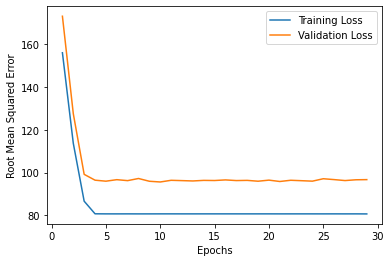

In [13]:
# The following variables are the hyperparameters
learning_rate = 0.08
epochs = 30
batch_size = 100

# Split the original training set into reduced training set and a validation set
validation_split = 0.2

# Identify the feature and the label
my_feature = "median_income"  # the median income on a specific city block
my_label = "median_house_value"  # the median house value in a specific city block
# That is, we're going to create a model that predicts house value based soley
# on the neighbourhood's median income.

# Invoke the functions to build and train the model
my_model = build_model(learning_rate)
epochs, rmse, history = train_model(my_model, train_df, my_feature,
                                    my_label, epochs, batch_size, 
                                    validation_split)

plot_the_loss_curve(epochs, history["root_mean_squared_error"], 
                    history["val_root_mean_squared_error"])

**Task 2: Determine why the loss curves differ**

No matter how you split the trainning set and validation set, the loss curves differ significantly.

Evidently, the data in th training set isn't similar enough to the data in the validation set. Counterintuitive? Yes, but this problem is pretty common in machine learning.

Our task is to determine why the loss curves aren't highly similar.

As with most issues in machine learning, the problem is rooted in the data itself. 

To solve this mystery, of why the training set and the validation set aren't almost identical, write a line or two of Pandas code in the following code cell.

Here are a couple of hints:
- A reduced training set (the original training set - the validation set)
- The validation set

By default, the pandas `head()` method outputs the first five rows of the DataFrame. To see more of the training set, specify the n argument to head and assign a large posive integer to n.

In [18]:
# Write some code in this cell

# Examine examples 0 through 4 and examples 995 through 999 of the training set
train_df.head(n=1000)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.3,34.2,15.0,5612.0,1283.0,1015.0,472.0,1.5,66.9
1,-114.5,34.4,19.0,7650.0,1901.0,1129.0,463.0,1.8,80.1
2,-114.6,33.7,17.0,720.0,174.0,333.0,117.0,1.7,85.7
3,-114.6,33.6,14.0,1501.0,337.0,515.0,226.0,3.2,73.4
4,-114.6,33.6,20.0,1454.0,326.0,624.0,262.0,1.9,65.5
...,...,...,...,...,...,...,...,...,...
995,-117.1,32.5,8.0,6533.0,1217.0,4797.0,1177.0,4.0,144.4
996,-117.1,34.6,6.0,5110.0,1044.0,1938.0,724.0,3.2,112.8
997,-117.1,34.2,22.0,4397.0,931.0,1145.0,445.0,4.5,108.4
998,-117.1,34.0,24.0,4144.0,826.0,2127.0,772.0,2.5,96.0


We find that the original training set is sorted by longitude.

Apparently, longitude influences the relationship of `total_rooms` to `median_house_value`.

**Task 3: Fix the problem**

To fix the problem, shuffle the examples in the training set before splitting the examples into a training set and a validation set.

To do so, take the following steps:
- Shuffle the data in the training set by adding the following line anywhere before you call `train_model` (In the code cell associated with Task 1):

`shuffled_train_df = train_df.reindex(np.random.permutations(train_df.index)`
- Pass `shuffled_train_df` (instead of `train_df`) as the second argument to `train_model` (In the code cell associated with task 1) so that the call becomes as folows:

`epochs, rmse, history = train_model(my_model, shuffled_train_df, my_feature, my_label, epochs, batch_size, 
validation_split)`

**The complete implementation**

Epoch 1/70
136/136 [==============================] - 1s 2ms/step - loss: 45060.0039 - root_mean_squared_error: 212.2734 - val_loss: 34552.7383 - val_root_mean_squared_error: 185.8837
Epoch 2/70
136/136 [==============================] - 0s 2ms/step - loss: 26499.3574 - root_mean_squared_error: 162.7862 - val_loss: 19414.1152 - val_root_mean_squared_error: 139.3345
Epoch 3/70
136/136 [==============================] - 0s 2ms/step - loss: 14326.5645 - root_mean_squared_error: 119.6936 - val_loss: 10372.9951 - val_root_mean_squared_error: 101.8479
Epoch 4/70
136/136 [==============================] - 0s 2ms/step - loss: 8195.7139 - root_mean_squared_error: 90.5302 - val_loss: 7203.0771 - val_root_mean_squared_error: 84.8709
Epoch 5/70
136/136 [==============================] - 0s 2ms/step - loss: 6993.5708 - root_mean_squared_error: 83.6276 - val_loss: 7114.6743 - val_root_mean_squared_error: 84.3485
Epoch 6/70
136/136 [==============================] - 0s 2ms/step - loss: 6990.1411 - ro

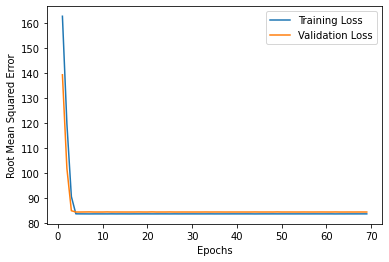

In [20]:
# The following variables are the hyperparameters
learning_rate = 0.08
epochs = 70
batch_size = 100

# Split the original training set into a reduced training set and a validation set
validation_split = 0.2

# Identify the feature and the label
my_feature = "median_income"  # the median income on a specific city block
my_label = "median_house_value"  # the median house value on a specific city block
# That is, we're going to create a model that predicts house value based soley
# on the neighbourhood's median income.

# Shuffle the examples
shuffled_train_df = train_df.reindex(np.random.permutation(train_df.index))

# Invoke the functions to build and train the model
# Train on the shuffled training set
my_model = build_model(learning_rate)
epochs, rmse, history = train_model(my_model, shuffled_train_df, my_feature,
                                    my_label, epochs, batch_size,
                                    validation_split)

plot_the_loss_curve(epochs, history["root_mean_squared_error"],
                    history["val_root_mean_squared_error"])

Experiment with the `validation_split` to answer the following questions;
- With the training set shuffled, is the final loss fot the training set closer to the final loss for the validation set?
- At what range of values of `validation-split` do the final loss values for the training set and the validation set divulge meaningfully? Why?


Yes, after shuffling the original training set, the final loss values for the training set and the validation set become more closer.

If the validation split is < 0.15, the final loss values for the training set and the validation set divulge meaningfully.

Apparently, the validation set no longer contains enough examples.

**Task 4: Use the Test Dataset to evaluate your model's perfomance**

The test set usuually acts as the ultimate judge of a model's quality.

The test set can serve as an impartial judge because it's examples haven't been used in training the model.

Run the following code cell to evaluate the model with the test set:

In [21]:
x_test = test_df[my_feature]
y_test = test_df[my_label]

result = my_model.evaluate(x_test, y_test, batch_size = batch_size)

30/30 [==============================] - 0s 3ms/step - loss: 7010.6118 - root_mean_squared_error: 83.7294


Compare the root mean squared error of the model when evaluated of the three datasets.

Look for the root mean squared error in the final training epoch fo the `training_set` and `validation_set`, and examine the root mean squared error for the `test_set`.

Ideally, the root mean squared error of all th tree sets should be similar. Are they?

In our experiments, yes, the rmse values were similar enough.